# MOSFET gm/ID Evaluation Script for IHP SG13G2

**Copyright 2024 Boris Murmann and Harald Pretl**

Licensed under the Apache License, Version 2.0 (the “License”); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

In [1]:
devices = ['sg13_lv_nmos', 'sg13_lv_pmos']
choice = 0 # select with device to plot, start from 0

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# widths used for characterization
w = np.array([5, 5])

In [3]:
# read ngspice data
df_raw = pd.read_csv('./techsweep_'+devices[choice]+'.txt', sep=r'\s+')
par_names = df_raw.columns.to_list()
par_prefix = par_names[1].split('[')[0]

# remove extra headers in file body and unwanted columns
df_raw = df_raw[~df_raw['v-sweep'].str.contains('v-sweep')]
df = df_raw.drop(['v-sweep', 'v-sweep.1'], axis=1)
df = df.apply(pd.to_numeric)

# rename columns for readability
df.columns = df.columns.str.removeprefix(par_prefix+'[')
df.columns = df.columns.str.removesuffix(']')
print(df.columns)

Index(['cdd', 'cgb', 'cgd', 'cgdol', 'cgg', 'cgs', 'cgsol', 'css', 'fug',
       'gds', 'gm', 'gmb', 'ids', 'l', 'sid', 'vdss', 'vth', 'b', 'd', 'g'],
      dtype='object')

In [4]:
# sweep variable vectors
l = (np.unique(abs(df['l']))*1e6).round(3)
vgs = np.unique(abs(df['g']))
vds = np.unique(abs(df['d']))
vsb = np.unique(abs(df['b']))

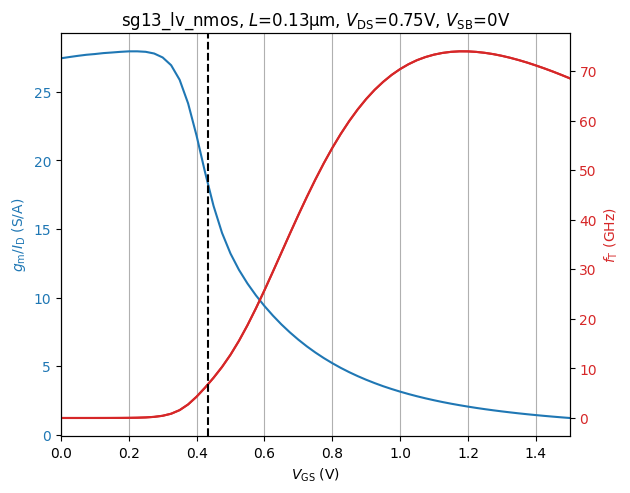

In [5]:
# plot gm/ID and fT versus gate bias
L1 = min(l); VDS1=0.75; VSB1=0
df1 = df.loc[(df['l'] == L1*1e-6) & (abs(df['d']) == VDS1) & (abs(df['b']) == VSB1)]
gm_id1 = df1['gm'].values/df1['ids'].values
cgg1 = df1['cgg'].values + df1['cgdol'].values+df1['cgsol'].values 
ft1 = df1['gm'].values/cgg1/2/np.pi
ft2 = df1['fug'].values

fig, ax1 = plt.subplots()
ax1.grid(axis='x')
ax1.set_xlabel(r'$V_\mathrm{GS}$ (V)')
color = 'tab:blue'
ax1.set_ylabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)', color=color)
ax1.plot(vgs, gm_id1, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel(r'$f_\mathrm{T}$ (GHz)', color=color)
ax2.plot(vgs, ft1/1e9, color=color)
ax2.plot(vgs, ft2/1e9, color=color)
ax2.tick_params(axis='y', labelcolor=color)
fig.tight_layout()
plt.title(devices[choice]+', $L$='+str(L1)+r'µm, $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.xlim(0, 1.5)
plt.axvline(x = df1['vth'].values[0], color='k', linestyle='--')
plt.show()

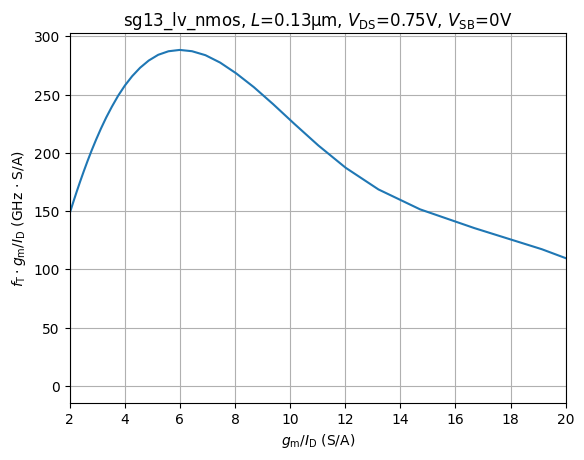

In [6]:
# plot product of gm/ID and fT versus gm/ID
plt.plot(gm_id1, gm_id1*ft1/1e9)
plt.xlim(2, 20)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$f_\mathrm{T} \cdot g_\mathrm{m}/I_\mathrm{D}$ (GHz $\cdot$ S/A)')
plt.title(devices[choice]+', $L$='+str(L1)+r'µm, $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()

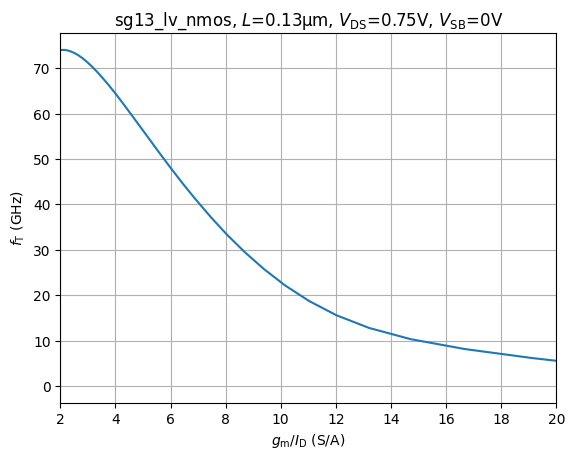

In [7]:
# plot fT versus gm/ID
plt.plot(gm_id1, ft1/1e9)
plt.xlim(2, 20)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$f_\mathrm{T}$ (GHz)')
plt.title(devices[choice]+', $L$='+str(L1)+r'µm, $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()

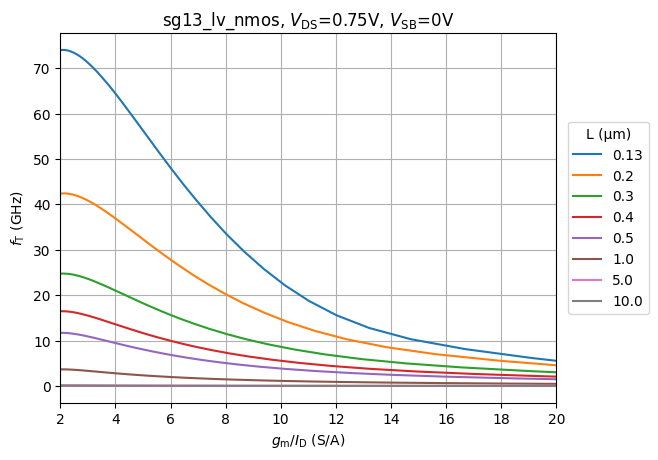

In [8]:
# plot fT versus gm/ID for all L
VDS2=0.75; VSB2=0
df2 = df.loc[(abs(df['d']) == VDS2) & (abs(df['b']) == VSB2)]
gm_id2 = df2['gm'].values/df2['ids'].values
gm_id2 = np.reshape(gm_id2, (len(vgs), -1), order='F')
ft2 = df2['gm'].values/(df2['cgg'].values+df2['cgdol'].values+df2['cgsol'].values)/2/np.pi
ft2 = np.reshape(ft2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, ft2/1e9)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L (µm)', labels=l.tolist())
plt.xlim(2, 20)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$f_\mathrm{T}$ (GHz)')
plt.title(devices[choice]+r', $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()

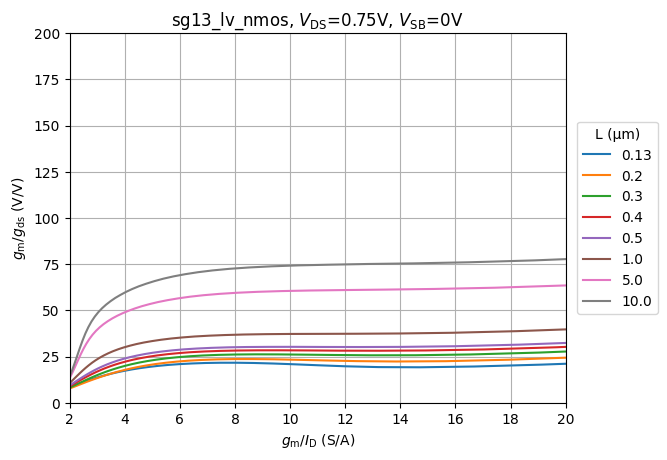

In [9]:
# plot gm/gds versus gm/ID for all L
gm_gds2 = df2['gm'].values/df2['gds'].values
gm_gds2 = np.reshape(gm_gds2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.plot(gm_id2, gm_gds2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L (µm)', labels=l.tolist())
plt.xlim(2, 20)
plt.ylim(0, 200)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$g_\mathrm{m}/g_\mathrm{ds}$ (V/V)')
plt.title(devices[choice]+r', $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.grid()
plt.show()

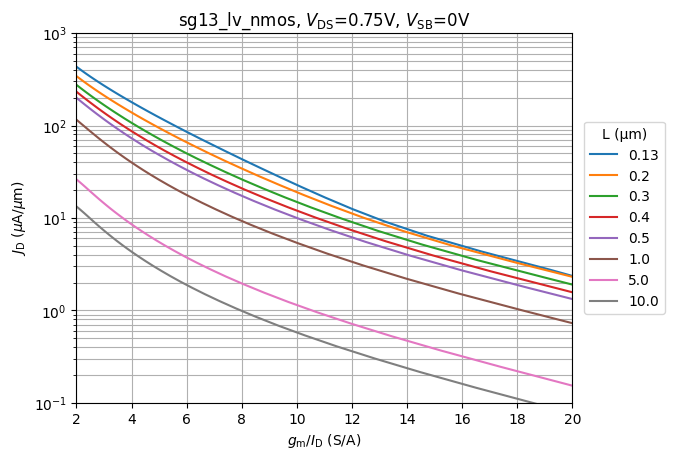

In [10]:
# plot Jd versus gm/ID for all L
jd2 = df2['ids'].values/w[choice]/1e-6
jd2 = np.reshape(jd2, (len(vgs), -1), order='F')

fig, ax = plt.subplots()
ax.semilogy(gm_id2, jd2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L (µm)', labels=l.tolist())
plt.xlim(2, 20)
plt.ylim(1e-1, 1e3)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$J_\mathrm{D}$ ($\mu$A/$\mu$m)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+r', $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.show()

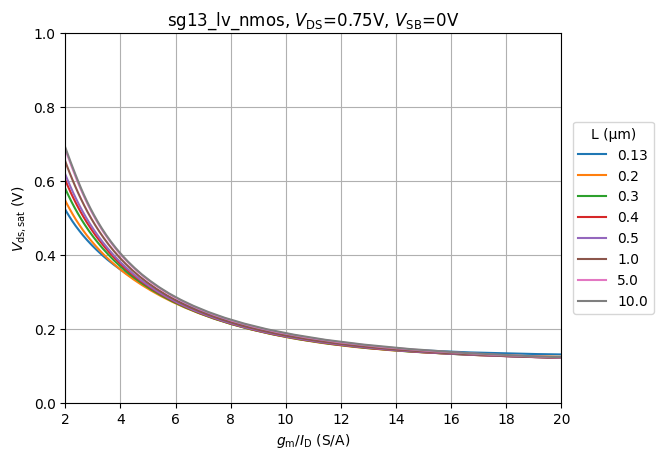

In [11]:
# plot Vdss versus gm/ID for all L
vdss2 = df2['vdss']
vdss2 = np.reshape(vdss2, (len(vgs), -1), order='F')
fig, ax = plt.subplots()
ax.plot(gm_id2, vdss2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L (µm)', labels=l.tolist())
plt.xlim(2, 20)
plt.ylim(0, 1)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$V_\mathrm{ds,sat}$ (V)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+r', $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.show()

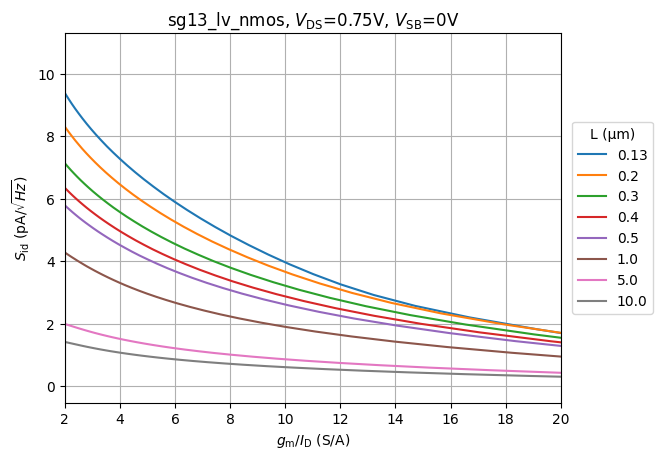

In [12]:
# plot Sid versus gm/ID for all L
sid2 = np.sqrt(df2['sid'].values)*1e12
sid2 = np.reshape(sid2, (len(vgs), -1), order='F')
fig, ax = plt.subplots()
ax.plot(gm_id2, sid2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L (µm)', labels=l.tolist())
plt.xlim(2, 20)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$S_\mathrm{id}$ (pA/$\sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+r', $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.show()

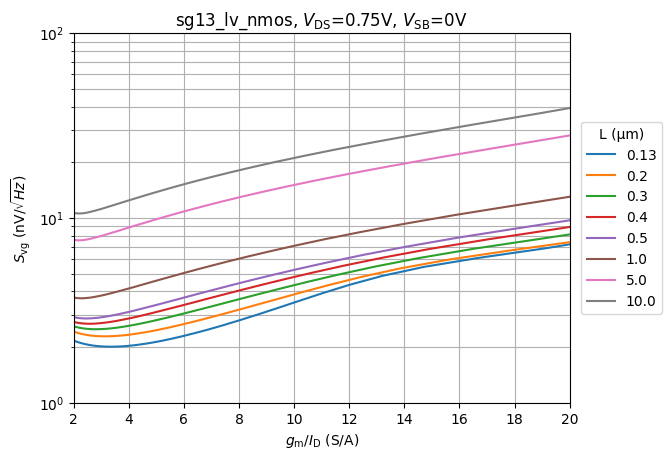

In [13]:
# plot Svg versus gm/ID for all L
svg2 = np.sqrt(df2['sid'].values)/df2['gm'].values*1e9
svg2 = np.reshape(svg2, (len(vgs), -1), order='F')
fig, ax = plt.subplots()
ax.semilogy(gm_id2, svg2)
ax.legend(loc='center right', bbox_to_anchor=(1.2, 0.5), title='L (µm)', labels=l.tolist())
plt.xlim(2, 20)
plt.ylim(1, 100)
plt.xlabel(r'$g_\mathrm{m}/I_\mathrm{D}$ (S/A)')
plt.ylabel(r'$S_\mathrm{vg}$ (nV/$\sqrt{Hz}$)')
plt.grid(which='minor')
plt.grid(which='major')
plt.title(devices[choice]+r', $V_\mathrm{DS}$='+str(VDS1)+r'V, $V_\mathrm{SB}$='+str(VSB1)+'V')
plt.show()